In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys  
caffe_root='./'  
sys.path.insert(0, caffe_root + '/python')  
import os,caffe
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
os.chdir(caffe_root)
sys.path.insert(0,caffe_root+'python')

In [4]:
net = caffe.Net(caffe_root + 'models/deploy.prototxt',
                caffe_root + 'models/model_pre_train_syn.caffemodel',
                caffe.TEST)
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1_1', (64, 3, 3, 3)),
 ('conv1_2', (64, 64, 3, 3)),
 ('conv2_1', (128, 64, 3, 3)),
 ('conv2_2', (128, 128, 3, 3)),
 ('conv3_1', (256, 128, 3, 3)),
 ('conv3_2', (256, 256, 3, 3)),
 ('conv3_3', (256, 256, 3, 3)),
 ('conv4_1', (512, 256, 3, 3)),
 ('conv4_2', (512, 512, 3, 3)),
 ('conv4_3', (512, 512, 3, 3)),
 ('conv5_1', (512, 512, 3, 3)),
 ('conv5_2', (512, 512, 3, 3)),
 ('conv5_3', (512, 512, 3, 3)),
 ('fc6', (1024, 512, 3, 3)),
 ('fc7', (1024, 1024, 1, 1)),
 ('conv6_1', (256, 1024, 1, 1)),
 ('conv6_2', (512, 256, 3, 3)),
 ('conv7_1', (128, 512, 1, 1)),
 ('conv7_2', (256, 128, 3, 3)),
 ('conv8_1', (128, 256, 1, 1)),
 ('conv8_2', (256, 128, 3, 3)),
 ('conv9_1', (128, 256, 1, 1)),
 ('conv9_2', (256, 128, 3, 3)),
 ('conv4_3_norm', (512,)),
 ('conv4_3_norm_mbox_loc', (240, 512, 3, 5)),
 ('conv4_3_norm_mbox_conf', (40, 512, 3, 5)),
 ('fc7_mbox_loc', (240, 1024, 3, 5)),
 ('fc7_mbox_conf', (40, 1024, 3, 5)),
 ('conv6_2_mbox_loc', (240, 512, 3, 5)),
 ('conv6_2_mbox_conf', (40, 512, 3, 5)

In [5]:
#编写一个函数，用于显示各层的参数
def show_feature(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.imshow(data)
    plt.axis('off')

(64, 3, 3, 3)


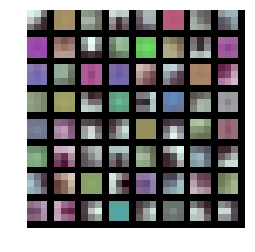

In [7]:
# 第一个卷积层，参数规模为(64,3,3,3)，即64个3*3的3通道filter
weight = net.params["conv1_1"][0].data
print weight.shape
show_feature(weight.transpose(0, 2, 3, 1))

(64, 64, 3, 3)


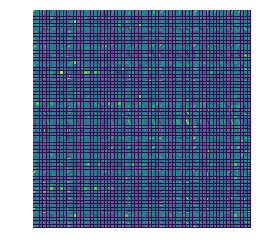

In [8]:
# 第二个卷积层的权值参数，共有64*64个filter,每个filter大小为3*3
weight = net.params["conv1_2"][0].data
print weight.shape
show_feature(weight.reshape(64**2, 3, 3))